# Wrangling with the mutateX output


### The question is: How many of our variants has positive delta G's for all their potential mutations?

In [1]:
import pandas as pd


df = pd.read_csv("../energies.csv")


# Define a function to count negative values in a row
def count_negative(row):
    # Count the number of negative values in amino acid columns
    negative_count = sum(1 for value in row[4:] if value > 0)
    # Check if more than half of the values are negative
    return negative_count == 19

# Apply the function to each row and sum the results
residues_with_more_than_half_negative = df.apply(count_negative, axis=1).sum()

print("Number of residues where 19 of the delta G's are positve:", residues_with_more_than_half_negative)

Number of residues where 19 of the delta G's are positve: 3


In [21]:
# Define a function to check if more than half of the values in amino acid columns are negative
def is_more_positive_all(row):
    # Count the number of negative values in amino acid columns
    negative_count = sum(1 for value in row[4:] if value >= 2)
    # Check if more than half of the values are negative
    return negative_count == 19


# Apply the function to each row and store the indices of residues meeting the criteria
residues_indices = df[df.apply(is_more_positive_all, axis=1)].index

# Get the residues using the indices
residues = df.loc[residues_indices, ['Residue #', 'WT residue type']]

print("Residues where all the mutations except the WT residue has a positive delta G")
print(residues)

Residues where all the mutations except the WT residue has a positive delta G
    Residue # WT residue type
63       1049               G


### Another question: how many of the variants are more than 50, 60, 70, 80 and 90-% of the mutations considered to be pathogenic? i.e has a delta G > 3. 

Residues for >50% of values greater than 3:
[693, 699, 711, 729, 736, 753, 762, 764, 783, 853, 864, 908, 940, 967, 973, 998, 1004, 1023, 1027, 1029, 1049, 1145, 1189, 1253, 1260, 1282, 1285]
Residues for >60% of values greater than 3:
[693, 699, 729, 753, 762, 764, 783, 853, 908, 967, 973, 1004, 1023, 1029, 1049, 1145, 1189, 1253, 1260, 1282, 1285]
Residues for >70% of values greater than 3:
[693, 699, 753, 762, 764, 783, 853, 908, 1023, 1049, 1145, 1189, 1253]
Residues for >80% of values greater than 3:
[693, 699, 753, 1049]
Residues for >90% of values greater than 3:
[]


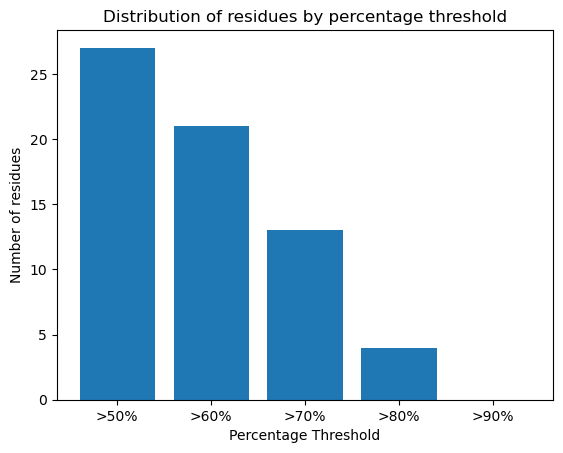

In [10]:
from matplotlib import pyplot as plt



# Define a function to count values greater than 3 in a row
def count_values_greater_than(row, threshold):
    # Count the number of values greater than the threshold in amino acid columns
    count = sum(1 for value in row[4:] if value > threshold)
    return count

# Define threshold
threshold = 3

# Initialize lists to store indices for each percentage threshold
indices = []

# Calculate indices for each percentage threshold
for percentage in [0.5, 0.6, 0.7, 0.8, 0.9]:
    # Calculate the number of columns required to meet the percentage threshold
    required_columns = int((len(df.columns) - 4) * percentage)
    
    # Apply the function to each row and get the indices of rows meeting the criterion
    indices.append(df[df.apply(lambda row: count_values_greater_than(row, threshold) > required_columns, axis=1)].index)

# Initialize lists to store residues for each percentage threshold
residues_by_threshold = [[] for _ in range(len(indices))]

# Populate residues for each percentage threshold
for i, idx in enumerate(indices):
    residues_by_threshold[i] = df.loc[idx, 'Residue #'].tolist()

# Print residues for each percentage threshold
for i, percentage in enumerate([50, 60, 70, 80, 90]):
    print(f"Residues for >{percentage}% of values greater than {threshold}:")
    print(residues_by_threshold[i])

# Create bar plot
plt.bar(['>50%', '>60%', '>70%', '>80%', '>90%'], [len(indices[0]), len(indices[1]), len(indices[2]), len(indices[3]), len(indices[4])])
plt.xlabel('Percentage Threshold')
plt.ylabel('Number of residues')
plt.title('Distribution of residues by percentage threshold')
plt.savefig('FiguresAndPics/distrubution_of_destabalising_muts')
plt.show()


# Wrangling the alphamissense output

<Axes: xlabel='class'>

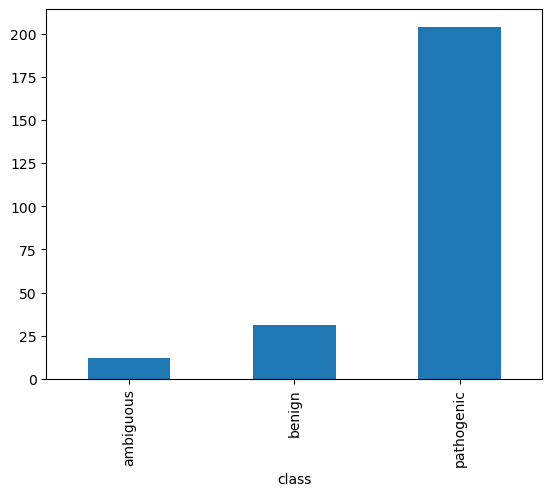

In [6]:
import pandas as pd 



alpham_df = pd.read_csv("alphamissense.txt", sep = "\t", header = None)
column_names = ["acc", "variant", "value", "class"]
alpham_df.columns = column_names


threshold50_residues = [str(residue) for residue in residues_by_threshold[-5]]
threshold60_residues = [str(residue) for residue in residues_by_threshold[-4]]
threshold70_residues = [str(residue) for residue in residues_by_threshold[-3]]
threshold80_residues = [str(residue) for residue in residues_by_threshold[-2]]


filter70_condition = alpham_df["variant"].str.contains('|'.join(threshold70_residues))
alphafiltered70 = alpham_df[filter70_condition]

alphafiltered70_grouped = (alphafiltered70.groupby(["class"])).size()
alphafiltered70_grouped.plot(kind='bar')
#Plot that shows how alphamissense catgorises the 70% above 3 delta G 


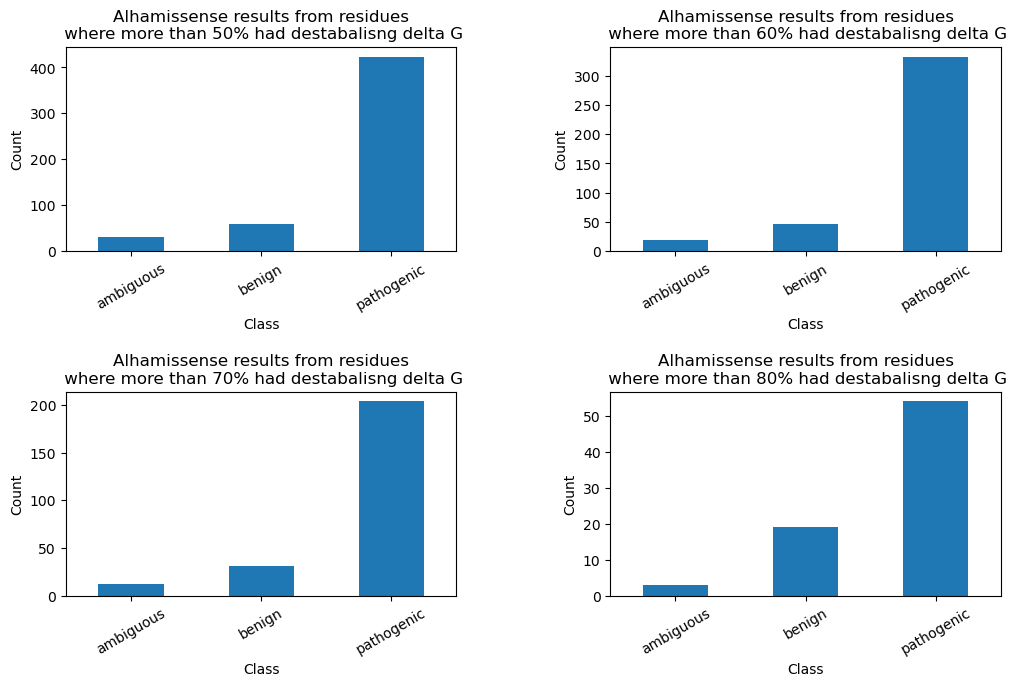

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the code for loading data and filtering is already executed

# Lists of residues by different thresholds
threshold_lists = {
    "threshold50": threshold50_residues,
    "threshold60": threshold60_residues,
    "threshold70": threshold70_residues,
    "threshold80": threshold80_residues
}

# Define the layout for subplots
num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.tight_layout(pad=8.0)

# Loop through each threshold list and plot in subplots
for i, (threshold_name, threshold_residues) in enumerate(threshold_lists.items()):
    row = i // num_cols
    col = i % num_cols
    
    # Filter the data based on the threshold residues
    filter_condition = alpham_df["variant"].str.contains('|'.join(threshold_residues))
    alphafiltered = alpham_df[filter_condition]
    
    # Group the filtered data by class and calculate the size of each group
    grouped_data = alphafiltered.groupby(["class"]).size()
    
    # Plotting the grouped data in the appropriate subplot
    ax = axes[row, col]
    grouped_data.plot(kind='bar', ax=ax)
    
    # Rotate x-axis tick labels by 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    
    # Adding labels and title
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_title(f'Alhamissense results from residues\n where more than {threshold_name[-2:]}% had destabalisng delta G')

    
plt.savefig('FiguresAndPics/alpha_mutateX_barplot')
plt.show()

In [17]:
for items, keys in threshold_lists.items():
    print(items, keys, len(keys))

threshold50 ['693', '699', '711', '729', '736', '753', '762', '764', '783', '853', '864', '908', '940', '967', '973', '998', '1004', '1023', '1027', '1029', '1049', '1145', '1189', '1253', '1260', '1282', '1285'] 27
threshold60 ['693', '699', '729', '753', '762', '764', '783', '853', '908', '967', '973', '1004', '1023', '1029', '1049', '1145', '1189', '1253', '1260', '1282', '1285'] 21
threshold70 ['693', '699', '753', '762', '764', '783', '853', '908', '1023', '1049', '1145', '1189', '1253'] 13
threshold80 ['693', '699', '753', '1049'] 4
